In [1]:
from SpinTools.spinhamiltonian import spinhamiltonian as sh
import numpy as np
from scipy.constants import physical_constants as spc
from scipy.constants import constants as sc
import itertools

h = spc["Planck constant"][0]

ham = sh.SpinHamiltonian("P")

In [17]:
def decorator(gamma_function):
    def wrapper_function(*args,**kwargs):
        return gamma_function(*args,**kwargs)
    return wrapper_function

@decorator
def zeeman(Bz):
    return ham.electron_zeeman([0,0,Bz]) + ham.nuclear_zeeman([0,0,Bz])

# @decorator
# def gamma(row,eigvec,hdrive):
#     return list(map(lambda col : 1e24*abs(np.matmul(eigvec[:,row].conjugate(), 
#                 np.matmul(hdrive,eigvec[:,col]))), range(row+1,len(eigvec))))

@decorator
def gamma(row,eigvec,hdrive):
    return list(map(lambda col : 1e24*abs(np.matmul(eigvec[:,col].conjugate(), 
                np.matmul(hdrive,eigvec[:,row]))), range(row+1,len(eigvec))))

@decorator
def hamiltonian(Bz):
    return ham.get_hamiltonian([0,0,Bz]) / h / 1e09
#     return ham.hyperfine()

@decorator
def estate(H):
    return np.linalg.eig(H)

@decorator
def E(evals):
    return evals[1] - evals[0]

def get_gamma_values(gam):
    gam = np.array([x for x in gam for x in x])
    gam = list(itertools.chain.from_iterable(gam))
    return list(filter(lambda a: a != 0, gam))

In [89]:
b = np.arange(0,1,0.001)
# b = [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9]

H = list(map(hamiltonian,b)) # Get spin hamiltonian
Hds = zeeman(1) # Get perturbation hamiltonian
e = list(map(estate,H)) # get eigenstates

# Get transition rate
gam = [[gamma(i,e[k][1],Hds) for i in range(len(Hds[0]))] for k in range(len(b))]

# Flatten transition rates and give only the values
gam = get_gamma_values(gam)

# Get eigenvalues for each matrix element
evals = [e[i][0] for i in range(len(b))]
# energy = [E(evals[i]) for i in range(len(b))]
energy = [abs(evals[i][1] - evals[i][0]) for i in range(len(b))]

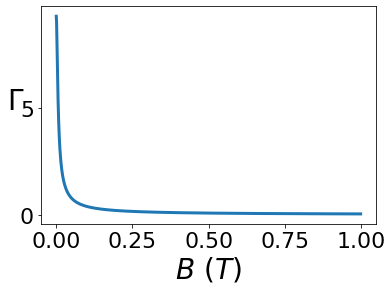

In [90]:
from matplotlib import pyplot as plt
plt.plot(b[0:len(b)],gam)
plt.xlabel('$B$ ($T$)')
plt.ylabel('$\Gamma$',rotation=0)
plt.show()

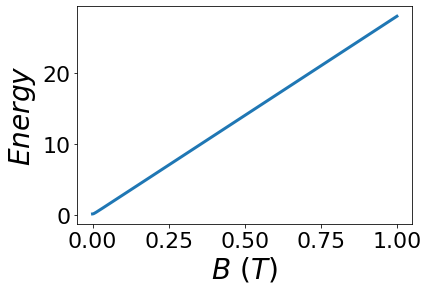

In [91]:
from matplotlib import pyplot as plt
plt.plot(b[0:len(b)],energy)
plt.xlabel('$B$ ($T$)')
plt.ylabel('$Energy$',rotation=90)
plt.show()

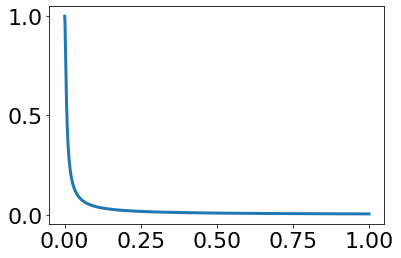

In [98]:
# plt.plot(b,energy)
plt.plot(b,gam/max(gam))
plt.show()

In [61]:
ev0 = e[0][0]
ev1 = e[1][0]
ev2 = e[2][0]
ev3 = e[3][0]
ev4 = e[4][0]
ev5 = e[5][0]
ev6 = e[6][0]
ev7 = e[7][0]
ev8 = e[8][0]
ev9 = e[9][0]

In [66]:
print(abs(ev0[1] - ev0[0]))
print(abs(ev1[1] - ev1[0]))
print(abs(ev2[1] - ev2[0]))
print(abs(ev3[1] - ev3[0]))
print(abs(ev4[1] - ev4[0]))
print(abs(ev5[1] - ev5[0]))
print(abs(ev6[1] - ev6[0]))
print(abs(ev7[1] - ev7[0]))
print(abs(ev8[1] - ev8[0]))
print(abs(ev9[1] - ev9[0]))

0.11753000000000001
2.8003133673212
5.59692593466192
8.394360499143467
11.192000704506086
13.989723180189984
16.787486793907558
19.58527391591683
22.38307573091685
25.18088734137503


In [71]:
abs(evals[0][1] - evals[0][0])

0.11753000000000001

In [40]:
# print(ev1 - ev0)
# print(ev2 - ev1)
# print(ev3 - ev2)
# print(ev4 - ev3)
# print(ev5 - ev4)
# print(ev6 - ev5)
# print(ev7 - ev6)
# print(ev8 - ev7)
# print(ev9 - ev8)
print(ev)
print(ev2)
print(ev3)
print(ev4)
print(ev5)
print(ev6)
print(ev7)
print(ev8)
print(ev9)

(1.5837413307669725+0j)
(3.138100161533945+0j)
(4.692458992300918+0j)
(6.2468178230678895+0j)
(7.801176653834863+0j)
(9.355535484601834+0j)
(10.909894315368806+0j)
(12.464253146135778+0j)
(14.018611976902752+0j)


In [21]:
energy

[(-5.59692593466192+0j),
 (-5.610912087149335+0j),
 (-5.624898254940131+0j),
 (-5.638884437920436+0j),
 (-5.652870635977505+0j),
 (-5.666856848999707+0j),
 (-5.680843076876509+0j),
 (-5.694829319498467+0j),
 (-5.708815576757205+0j),
 (-5.722801848545407+0j),
 (-5.736788134756808+0j),
 (-5.750774435286168+0j),
 (-5.764760750029279+0j),
 (-5.778747078882931+0j),
 (-5.792733421744922+0j),
 (-5.806719778514022+0j),
 (-5.820706149089986+0j),
 (-5.834692533373525+0j),
 (-5.848678931266291+0j),
 (-5.862665342670889+0j)]